In [76]:
#to import all the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from skimage import data
from skimage import io
from skimage import color
from skimage import morphology

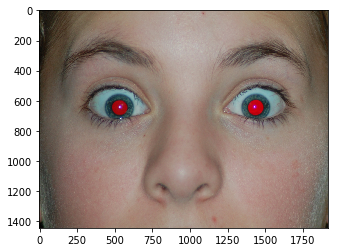

In [77]:
img = io.imread('BoldRedEye.jpg')
#img = io.imread('nonred.jpg')
plt.imshow(img)

# Select the POI and Histogram analyzing

With respect to the method which was described in the slides, we have to select an **Point of Interest (POI)** which is the pupils. Since the images are imported as arrays in scikit-image, we can adjust are POI with selecting appropriate rage of columns and rows.

The other important factor is the histogram of the POI which describes color distribution in the image and it is vital to define a threshold. As you can see, there is a minimum in histogram around color code 150 (in uint data-type) but as result displays it is not an appropriate way to make a thresholding. However, because of the big red area in the image the HSV color system could be a good candidate for conversion and threshold.

Text(0.5, 1.0, 'Point of intrest')

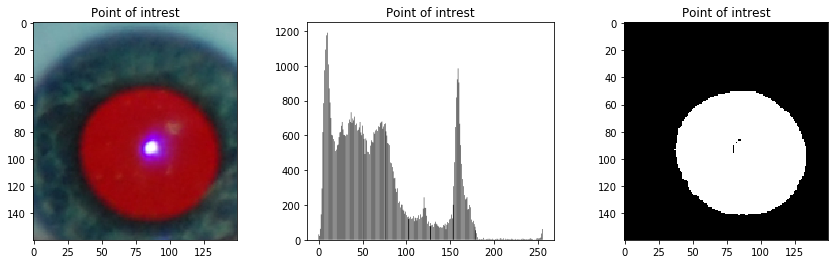

In [82]:
#poi = img[550:710, 1380:1500]
poi = img[550:710, 450:600]
threshold = poi[:,:,0] > 140

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax = axes.ravel()

ax[0].imshow(poi)
ax[0].set_title("Point of intrest")
ax[1].hist(poi.ravel(), bins=500, histtype='stepfilled', color='black')
ax[1].set_title("Point of intrest")
ax[2].imshow(threshold, cmap='gray')
ax[2].set_title("Point of intrest")

In [59]:
poihsv = color.rgb2hsv(poi)
poiH = poihsv[:, :, 0]
mask_poi = (poiH) > 0.97
type(poiH[1,2])

numpy.float64

Text(0.5, 1.0, 'Histogram of POI')

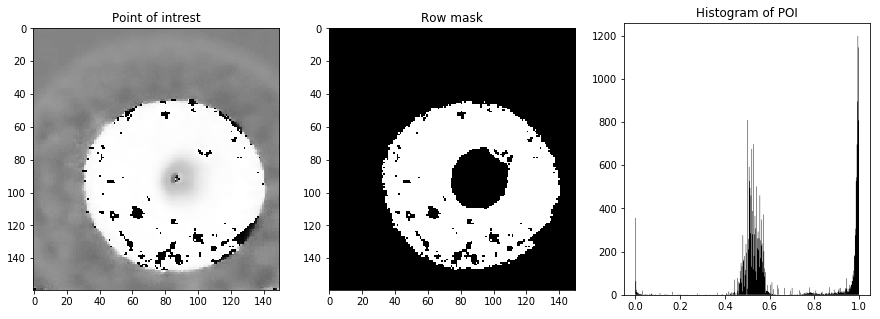

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(poiH, cmap='gray')
ax[0].set_title("Point of intrest")
ax[1].imshow(mask_poi, cmap='gray')
ax[1].set_title("Row mask")
ax[2].hist(poiH.ravel(), bins=500, histtype='stepfilled', color='black')
ax[2].set_title("Histogram of POI")

In [68]:
selem1 = morphology.disk(1)
selem2 = morphology.disk(5)
opening_poi = morphology.opening(mask_poi,selem1)
fill_poi = morphology.remove_small_holes(opening_poi,2000)
dilation_poi = morphology.dilation(threshold,selem2)
perfect_mask_poi = dilation_poi
inv_perfect_mask_poi = np.logical_not(perfect_mask_poi)

Text(0.5, 1.0, 'Perfect mask after dilation')

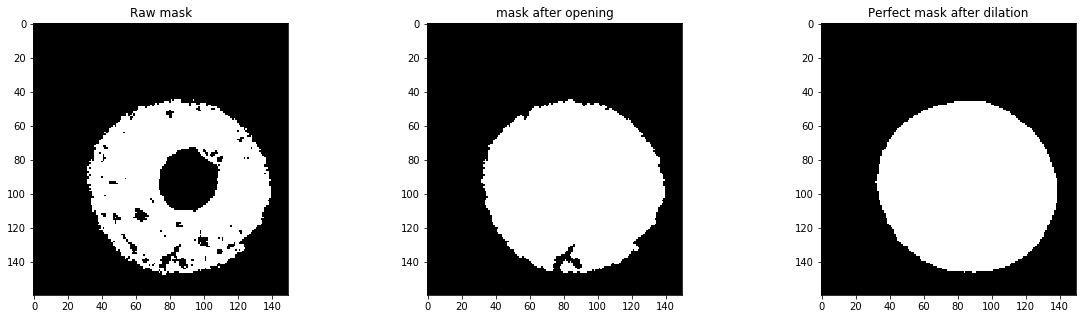

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(mask_poi, cmap='gray')
ax[0].set_title("Raw mask")
ax[1].imshow(fill_poi, cmap='gray')
ax[1].set_title("mask after opening")
ax[2].imshow(perfect_mask_poi, cmap='gray')
ax[2].set_title("Perfect mask after dilation")

In [70]:
poiR = poi[:, :, 0]
poiG = poi[:, :, 1]
poiB = poi[:, :, 2]

In [71]:
redeyefix = (poiG*perfect_mask_poi + poiB*perfect_mask_poi)/2
poiR = poiR * inv_perfect_mask_poi
poiR = poiR + redeyefix
img[550:710, 450:600,0] = poiR
#img[550:710, 1380:1500,0] = poiR

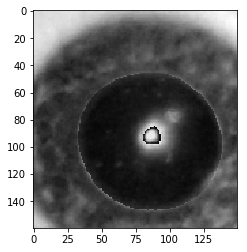

In [72]:
plt.imshow(poiR,cmap='gray')

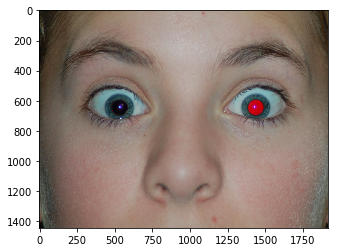

In [73]:
plt.imshow(img)

In [1]:
io.imsave('nonred.jpg',img)

NameError: name 'io' is not defined